## Final Project Submission

* Student name: Erica Gabriel
* Student pace: self paced / part time / full time: Full Time
* Scheduled project review date/time: TBD 
* Instructor name: Rafael Carrasco
* Blog post URL: TBD


## Part 1: CSV Imports and Data Cleaning 
In this section I analyzed and cleaned 5 datasets: 
* imdb.name.basics 
* bom.movie_gross
* imdb.title.akas
* rt.movie_info
* imdb.title.principals

The data cleaning step consisted of checking for Null & NaN values, extranesous values, placeholder data, and duplicates. The methods applied for treating the missing and extraneous data involved dropping columns that were missing more than 70% of values, filling continuous data with the respective column's median values, and filling categorical data with the mode value. Outlier data was treated with a Log Transformation, and duplicate rows were dropped. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

### Dataset: imdb.name.basics.csv.gz
The IMBD Name Basics data file provides the professional roles (actor, composer, cinematographer, etc.) and names of the individuals behind certain film projects listed in the "known_for_titles" column, with their death and birth years included.  

In [3]:
imdb_name_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz', compression='gzip')
imdb_name_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [4]:
imdb_name_df.info() #Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [4]:
imdb_name_df = imdb_name_df.drop(columns=['birth_year', 'death_year']) #Both of these columns are missing ~85%+ values 
imdb_name_df.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [5]:
for column in imdb_name_df.columns: #replace missing values in remaining columns with their modes
    imdb_name_df[column].fillna(imdb_name_df[column].mode()[0], inplace=True)
imdb_name_df.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [6]:
imdb_name_df.info() #Last check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
primary_profession    606648 non-null object
known_for_titles      606648 non-null object
dtypes: object(4)
memory usage: 18.5+ MB


In [7]:
duplicates = imdb_name_df[imdb_name_df.duplicated()] #Check for duplicate rows
print(len(duplicates))
duplicates.head()

0


,nconst,primary_name,primary_profession,known_for_titles


In [8]:
for col in imdb_name_df.columns: #check for extraneous values
    print(col, '\n', imdb_name_df[col].value_counts().head(), '\n\n')

nconst 
 nm4383902    1
nm7700280    1
nm1973897    1
nm8475914    1
nm0760997    1
Name: nconst, dtype: int64 


primary_name 
 James Brown        16
Michael Brown      16
David Brown        15
Michael Johnson    14
Mark Davis         13
Name: primary_name, dtype: int64 


primary_profession 
 actor       139646
actress      58430
producer     23324
composer     20125
writer       18247
Name: primary_profession, dtype: int64 


known_for_titles 
 tt4773466    30249
tt3014460       23
tt3428990       23
tt4803104       19
tt2120166       17
Name: known_for_titles, dtype: int64 




In [9]:
duplicates = imdb_name_df[imdb_name_df.duplicated(subset='primary_name')] 
print(len(duplicates))
duplicates.head(10) #Its common for people to share names and professions, will ignore for now

29445


,nconst,primary_name,primary_profession,known_for_titles
917,nm0680884,Bill Phillips,actor,"tt4878612,tt0203259,tt1856010,tt5030402"
4302,nm0414481,Jon Jacobs,"actor,director,writer","tt0322621,tt0165866,tt2311530,tt0137268"
5201,nm10372561,John Thomas,director,tt4773466
5993,nm0298181,Brad Fuller,"producer,executive","tt1291150,tt6133466,tt2436386,tt6644200"
6660,nm0852888,Michael Taylor,"producer,miscellaneous,writer","tt0117333,tt0115734,tt0128278,tt0079437"
8780,nm10308934,Bill Johnson,actor,tt4773466
9108,nm1084711,John Williams,"director,writer,cinematographer","tt0296172,tt1543224,tt0479926,tt3064356"
9570,nm0173433,Eric Colvin,"composer,music_department,miscellaneous","tt0120201,tt0118771,tt0147800,tt0119345"
9860,nm0430803,Mohan Joshi,actor,"tt0172574,tt6363784,tt0309618,tt0133024"
10393,nm10002165,Denis Chernov,actor,tt4773466


### Dataset: bom.movie_gross.csv.gz
This dataset contains the actual movie titles for popular movies, the year of release, the studios who released them, and the amount of money they grossed domestically and abroad.

In [10]:
Bom_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
Bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
Bom_gross_df.info() #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
Bom_gross_df['domestic_gross'] = Bom_gross_df['domestic_gross'].fillna(Bom_gross_df['domestic_gross'].median()) #replace NaNs with median values

In [190]:
for column in Bom_gross_df.columns: #replace missing values in remaining columns with their modes
    Bom_gross_df[column].fillna(Bom_gross_df[column].mode()[0], inplace=True)
Bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [191]:
duplicates = Bom_gross_df[Bom_gross_df.duplicated()] #Check for duplicate rows
print(len(duplicates))
duplicates.head()


0


,title,studio,domestic_gross,foreign_gross,year


In [192]:
duplicates = Bom_gross_df[Bom_gross_df.duplicated(subset='title')] #Check for duplicate rows
print(len(duplicates)) #print count of duplicate titles
duplicates.head()

1


,title,studio,domestic_gross,foreign_gross,year
3045,'71,WGUSA,43100.0,1200000,2017


In [193]:
for col in Bom_gross_df.columns: #check for extraneous values
    print(col, '\n', Bom_gross_df[col].value_counts().head(), '\n\n')

title 
 '71                    2
The Missing Picture    1
Indignation            1
For a Woman            1
Mia Madre              1
Name: title, dtype: int64 


studio 
 IFC      171
Uni.     147
WB       140
Fox      136
Magn.    136
Name: studio, dtype: int64 


domestic_gross 
 1400000.0    51
1100000.0    32
1000000.0    30
1300000.0    30
1200000.0    25
Name: domestic_gross, dtype: int64 


foreign_gross 
 1200000    1373
1100000      14
4200000      12
1900000      12
2500000      11
Name: foreign_gross, dtype: int64 


year 
 2015    450
2016    436
2012    400
2011    399
2014    395
Name: year, dtype: int64 




In [194]:
Bom_gross_df.info() #Last NaN check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3387 non-null object
domestic_gross    3387 non-null float64
foreign_gross     3387 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Dataset: imdb.title.akas.csv.gz
The IMDB title akas provides the titles amd title ids for select films, as well as the region and language they were released in, and key attributes of each film.

In [19]:
imdb_titlea_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz', compression='gzip')
imdb_titlea_df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [20]:
imdb_titlea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [21]:
imdb_titlea_df = imdb_titlea_df.drop(columns=['language', 'attributes']) #Both of these columns are missing ~85%+ values 
imdb_titlea_df.head()

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0


In [22]:
imdb_titlea_df['is_original_title'] = imdb_titlea_df['is_original_title'].fillna(imdb_titlea_df['is_original_title'].median())

In [23]:
for column in imdb_titlea_df.columns: #replace missing values in remaining columns with their modes
    imdb_titlea_df[column].fillna(imdb_titlea_df[column].mode()[0], inplace=True)
imdb_titlea_df.head()

,title_id,ordering,title,region,types,is_original_title
0,tt0369610,10,Джурасик свят,BG,imdbDisplay,0.0
1,tt0369610,11,Jurashikku warudo,JP,imdbDisplay,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,imdbDisplay,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,imdbDisplay,0.0
4,tt0369610,14,Jurassic World,FR,imdbDisplay,0.0


In [24]:
imdb_titlea_df.info() #Final NaN check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 6 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               331703 non-null object
types                331703 non-null object
is_original_title    331703 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.2+ MB


In [25]:
duplicates = imdb_titlea_df[imdb_titlea_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,title_id,ordering,title,region,types,is_original_title


In [26]:
for col in imdb_titlea_df.columns: #check for extraneous values
    print(col, '\n', imdb_titlea_df[col].value_counts().head(), '\n\n')

title_id 
 tt2488496    61
tt1201607    55
tt2310332    55
tt2278871    53
tt1790809    53
Name: title_id, dtype: int64 


ordering 
 1    122302
2     44686
3     41608
4     22586
5     15084
Name: ordering, dtype: int64 


title 
 Robin Hood    32
Home          30
Alone         27
Love          25
Broken        25
Name: title, dtype: int64 


region 
 US     104783
XWW     18467
RU      13817
DE      11634
FR      10990
Name: region, dtype: int64 


types 
 imdbDisplay    263717
original        44700
working          8680
alternative      6564
festival         3307
Name: types, dtype: int64 


is_original_title 
 0.0    287003
1.0     44700
Name: is_original_title, dtype: int64 




### Dataset: rt.movie_info.csv.gz
This dataset reveals the synopses, ratings and genres for films, along with their writer-director pairings. In addition we see the length of each film in the "runtime" column, and dates that the movie was released in theaters and to dvd. The currency and box office performance were included as well.

In [175]:
movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', compression= 'gzip')
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [176]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [177]:
for col in movie_info_df.columns: #check for extraneous values
    print(col, '\n', movie_info_df[col].value_counts().head(), '\n\n')

id 
 2000    1
697     1
673     1
674     1
675     1
Name: id, dtype: int64 


synopsis 
 A group of air crash survivors are stranded in the Mongolian desert with no chance of rescue. Facing a brutal environment, dwindling resources, and an attack by desert smugglers, they realize their only hope is doing the "impossible"--building a new plane from the wreckage.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [178]:
movie_info_df = movie_info_df.drop(columns=['currency', 'studio']) #The 'currency' column has null, NaN, and a placeholder value of $340, the studio column does not add predictive value, Microsoft can Bing "Top Studios" 
movie_info_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108 minutes


In [179]:
for column in movie_info_df.columns: #replace missing values in remaining columns with their modes
    movie_info_df[column].fillna(movie_info_df[column].mode()[0], inplace=True) # I kept box office becuase it gives insight to return on investment and is compatible with ML algorithms
movie_info_df.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,Steven Spielberg,Woody Allen,"Aug 18, 2006","Jan 2, 2007","33,886,034",106 minutes
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001","20,900,803",88 minutes
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,Woody Allen,"Jan 1, 1962","May 11, 2004","20,900,803",111 minutes
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002","20,900,803",101 minutes
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,Steven Spielberg,Luc Besson,"Sep 27, 2001","Feb 11, 2003","20,900,803",94 minutes


In [180]:
movie_info_df = movie_info_df.rename(columns = {'runtime':'runtime_minutes'}) #change column name to runtime_minutes to match runtime column from imdb_basics table

In [181]:
movie_info_df['runtime_minutes'] = movie_info_df['runtime_minutes'].map(lambda x: x.rstrip(' minutes')) #remove the string 'minutes'

In [182]:
movie_info_df['runtime_minutes'] = movie_info_df['runtime_minutes'].astype(float) #convert from string to type float
movie_info_df.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime_minutes
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001","20,900,803",104.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108.0


In [183]:
movie_info_df.info() #final check for NaN's

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
id                 1560 non-null int64
synopsis           1560 non-null object
rating             1560 non-null object
genre              1560 non-null object
director           1560 non-null object
writer             1560 non-null object
theater_date       1560 non-null object
dvd_date           1560 non-null object
box_office         1560 non-null object
runtime_minutes    1560 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 122.0+ KB


In [37]:
duplicates = movie_info_df[movie_info_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime_minutes


### Dataset: imdb.title.prinicipals.csv.gz
IMDB titles contains the movie title codes for popular movies, jobs that were involved in the making and filming of the movie, and the characters they played in those movies if applicable.

In [40]:
title_prinicipals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz', compression='gzip')
title_prinicipals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [41]:
title_prinicipals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [42]:
for col in title_prinicipals_df.columns: #check for extraneous values
    print(col, '\n', title_prinicipals_df[col].value_counts().head(), '\n\n')

tconst 
 tt3228868    10
tt3780094    10
tt5310818    10
tt4460546    10
tt6323258    10
Name: tconst, dtype: int64 


ordering 
 1    143454
2    134649
3    126538
4    117775
5    108862
Name: ordering, dtype: int64 


nconst 
 nm1930572    378
nm0000636    160
nm0000616    148
nm0103977    126
nm4394575    103
Name: nconst, dtype: int64 


category 
 actor              256718
director           146393
actress            146208
producer           113724
cinematographer     80091
Name: category, dtype: int64 


job 
 producer                   108168
screenplay                   8172
director of photography      6517
writer                       6479
co-director                  5796
Name: job, dtype: int64 


characters 
 ["Himself"]     43584
["Herself"]     16127
["Narrator"]     2218
["Alex"]          656
["David"]         620
Name: characters, dtype: int64 




In [43]:
title_prinicipals_df = title_prinicipals_df.drop(columns=['job', 'characters']) #job and character coulmns are neglible
title_prinicipals_df.head()

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


In [44]:
duplicates = title_prinicipals_df[title_prinicipals_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,tconst,ordering,nconst,category


In [45]:
title_prinicipals_df.info() #Final NaN/Null check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
tconst      1028186 non-null object
ordering    1028186 non-null int64
nconst      1028186 non-null object
category    1028186 non-null object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


## Part 2: Data Analysis and Data Visualization
In this section I combine the dataframes that my partner and I cleaned to Investigate 5 core areas:

1. The Impact of Movie Length on Viewer Ratings
2. The Relationship between Production Budget and Gross Domestic & Worldwide Sales
3. Target Regions for Movie Releases
4. Domestic Gross & Worldwide Performance by Movie Genre
5. Impact of Writers on Production Budget and Gross Sales

We targeted these areas with this question in mind: What would novice and prespective movie creators want to know? Areas 1 & 2 are addressed in this notebook.

### Question 1: Does the Length of a Movie Have on its Popularity/Ratings?
This section explores factors that could potentially contribute to movie reviews outside of production quality and plot. 

In [46]:
#Import Tn_budgets_df from Alex's Repo
tn_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression = 'gzip')
money_list = ['production_budget','domestic_gross','worldwide_gross']
for ser in money_list:
    tn_budgets_df[ser] = tn_budgets_df[ser].apply(lambda x:x.replace(',',''))
    tn_budgets_df[ser] = tn_budgets_df[ser].apply(lambda x:x.replace('$',''))
    tn_budgets_df[ser] = pd.to_numeric(tn_budgets_df[ser])

print ('TN Movie Budgets')
print(tn_budgets_df.head())
print(tn_budgets_df.columns)
print('\nNumber of entries:',len(tn_budgets_df),'\n')
print(tn_budgets_df.isna().sum())


TN Movie Budgets
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0          425000000       760507625       2776345279  
1          410600000       241063875       1045663875  
2          350000000        42762350        149762350  
3          330600000       459005868       1403013963  
4          317000000       620181382       1316721747  
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

Number of entries: 5782 

id                   0
release_date         0
movie                0
production_budge

In [170]:
movie_info_df = movie_info_df.rename(columns = {'runtime':'runtime_minutes'}) #change column name to runtime_minutes to match runtime column from imdb_basics table
movie_info_df.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,box_office,runtime_minutes
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,104 minutes
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013","600,000",108 minutes
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,116 minutes
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,128 minutes
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,200 minutes


In [48]:
#Import IMDB Titles Basics from Alex's repo
imdb_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression= 'gzip')
#Clean IMDB basics runtime_minutes
imdb_basics_df['runtime_minutes'].fillna(imdb_basics_df['runtime_minutes'].median(),inplace=True)
#Clean IMDB basics genres
imdb_basics_df['genres'].fillna('Genre Data Missing',inplace = True)
#Clean IMDB basics original_title
imdb_basics_df['original_title'].fillna(imdb_basics_df['primary_title'],inplace = True)

print ('IMDB title basics')
print(imdb_basics_df.columns)
print('Number of entries:', len(imdb_basics_df),'\n')
print(imdb_basics_df.isna().sum())

IMDB title basics
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')
Number of entries: 146144 

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


In [49]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146144 non-null object
start_year         146144 non-null int64
runtime_minutes    146144 non-null float64
genres             146144 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [50]:
imdb_basics_movie_info_df = imdb_basics_df.merge(movie_info_df) #Merge the Imdb Ratings and Imdb Title Basics DataFrames by Runtime Minutes
imdb_basics_movie_info_df.describe() #Here we want Measures of Dispersion for Runtime specifically

,start_year,runtime_minutes,id
count,3.207034e+06,3.207034e+06,3.207034e+06
mean,2.014615e+03,9.279260e+01,9.733295e+02
std,2.743608e+00,1.072834e+01,5.832871e+02
min,2.010000e+03,5.000000e+00,1.000000e+00
25%,2.012000e+03,8.700000e+01,4.700000e+02
50%,2.015000e+03,9.000000e+01,9.060000e+02
75%,2.017000e+03,9.600000e+01,1.495000e+03
max,2.115000e+03,2.940000e+02,2.000000e+03


In [51]:
#Import IMDB Ratings (Data Has Been Cleaned by Alex)
imdb_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression = 'gzip') 

In [59]:
imdb_ratings_basics_df = imdb_basics_df.merge(imdb_ratings_df) #Merge imdb_basics & imdb_ratings on runtime 
imdb_ratings_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [53]:
imdb_ratings_basics_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,93.864344,6.332729,3.523662e+03
std,2.614807,197.535152,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,4.900000e+01
75%,2016.000000,101.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


### Treating Outlier Data
This subsection explores 3 methods for trimming outliers in the imdb_ratings_basics_df dataframe: 

* Log Transformation
* IQR Score
* Replace Outliers with the Median Value


#### Log Transformation Method

In [63]:
#Treat Ouliers using Log Transformation Method
imdb_ratings_basics_df["time"] = imdb_ratings_basics_df["runtime_minutes"].map(lambda i: np.log(i) if i > 0 else 0) #Change coulm name to 'time', do log transformation on runtime_minutes 
print(imdb_ratings_basics_df['runtime_minutes'].skew())
print(imdb_ratings_basics_df['time'].skew()) #the change in skewness confirms that the distributiion has been treated for extreme values

-0.30612311392993885
-2.48749946704951


In [135]:
imdb_ratings_basics_df.head(2)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,time
0,tt0063540,Sunghursh,Sunghursh,2013,90.0,"Action,Crime,Drama",7.0,77,4.499810
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,4.736198


In [100]:
#Calculate Covariance with outliers removed due to Log Transformation
imdb_ratings_basics_df.cov()

,start_year,runtime_minutes,averagerating,numvotes,time
start_year,6.837216,2.719842,0.159263,-2.256047e+03,0.031603
runtime_minutes,2.719842,278.230754,-2.028169,5.172098e+04,3.458438
averagerating,0.159263,-2.028169,2.175561,1.987416e+03,-0.032078
numvotes,-2256.046892,51720.976047,1987.415945,9.177278e+08,572.881186
time,0.031603,3.458438,-0.032078,5.728812e+02,0.046549


In [101]:
#Calculate Covariance with outliers removed due to Log Transformation
imdb_ratings_basics_df.corr()

,start_year,runtime_minutes,averagerating,numvotes,time
start_year,1.000000,0.062359,0.041294,-0.028481,0.056018
runtime_minutes,0.062359,1.000000,-0.082436,0.102355,0.961001
averagerating,0.041294,-0.082436,1.000000,0.044478,-0.100800
numvotes,-0.028481,0.102355,0.044478,1.000000,0.087650
time,0.056018,0.961001,-0.100800,0.087650,1.000000


Text(0.5, 1.0, 'Movie Runtimes vs. Average Viewer Ratings')

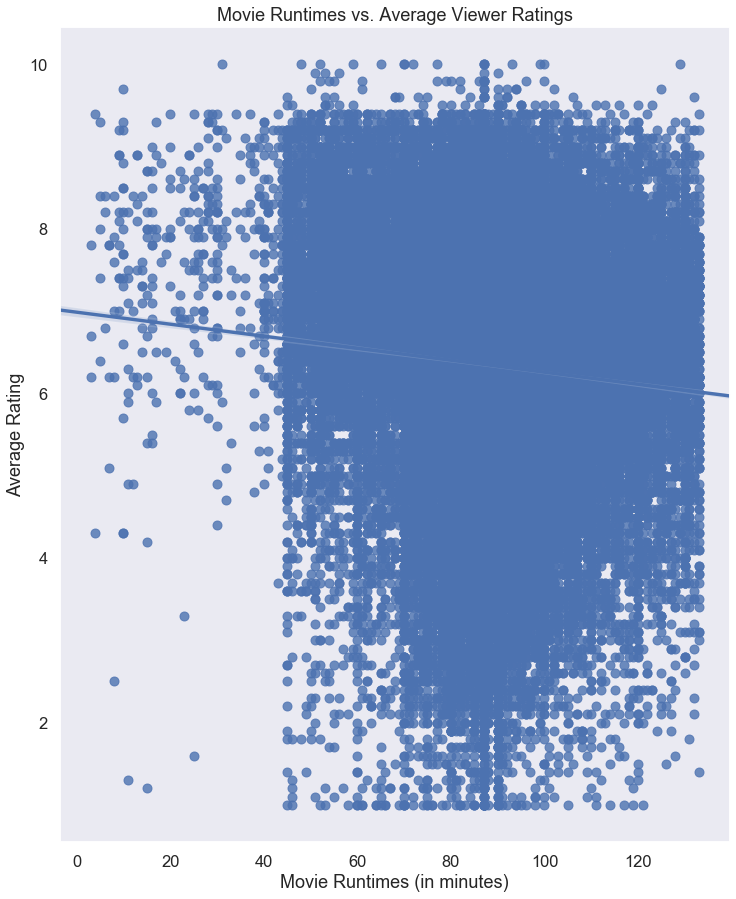

In [153]:
#Log Transformation Plot
sns.regplot(x= 'runtime_minutes', y= 'averagerating', data= imdb_ratings_basics_df)
plt.grid(False)
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

Text(0.5, 1, 'Movie Runtimes vs. Average Viewer Ratings')

<Figure size 1152x720 with 0 Axes>

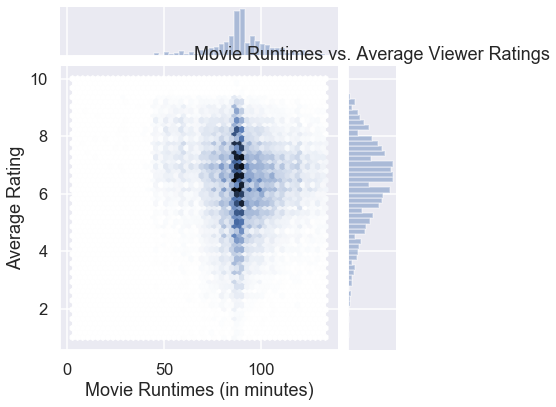

In [136]:
#Try Log Transformation with .Joinplot for Better Visual 
plt.figure(figsize=(16,10))
sns.set_context('talk')
sns.jointplot(x= 'runtime_minutes', y= 'averagerating', data= imdb_ratings_basics_df, kind='hex').set_axis_labels('Movie Runtimes (in minutes)', 'Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

#### IQR Score

In [55]:
#Remove Outliers 

#Calculate IQR
Q1 = imdb_ratings_basics_df.quantile(.25) #Calculate the 25th percentile 
Q3 = imdb_ratings_basics_df.quantile(.75) #Calculate the 75th percentile 
IQR = Q3 - Q1
print(IQR)

#Trim Outliers by IQR Score
ratings_basics_trim_df = imdb_ratings_basics_df[~((imdb_ratings_basics_df < (Q1 - 1.5 * IQR)) |(imdb_ratings_basics_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(ratings_basics_trim_df.shape)


start_year           4.0
runtime_minutes     18.0
averagerating        1.9
numvotes           268.0
dtype: float64
(55182, 8)


#### Replace Outliers with the Median Value

In [61]:
#Replace Outliers with the Median
print(imdb_ratings_basics_df['runtime_minutes'].quantile(0.50)) #Print the median
print(imdb_ratings_basics_df['runtime_minutes'].quantile(0.95)) #Print the 95th percentile
imdb_ratings_basics_df['runtime_minutes'] = np.where(imdb_ratings_basics_df['runtime_minutes'] > 133, 90, imdb_ratings_basics_df['runtime_minutes']) #Replace values greater than the 95th percentile with the median value
imdb_ratings_basics_df.describe()

90.0
133.0


,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,89.812351,6.332729,3.523662e+03
std,2.614807,16.680250,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,83.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,4.900000e+01
75%,2016.000000,98.000000,7.400000,2.820000e+02
max,2019.000000,133.000000,10.000000,1.841066e+06


Text(0.5, 1.0, 'Movie Runtimes vs. Average Viewer Ratings')

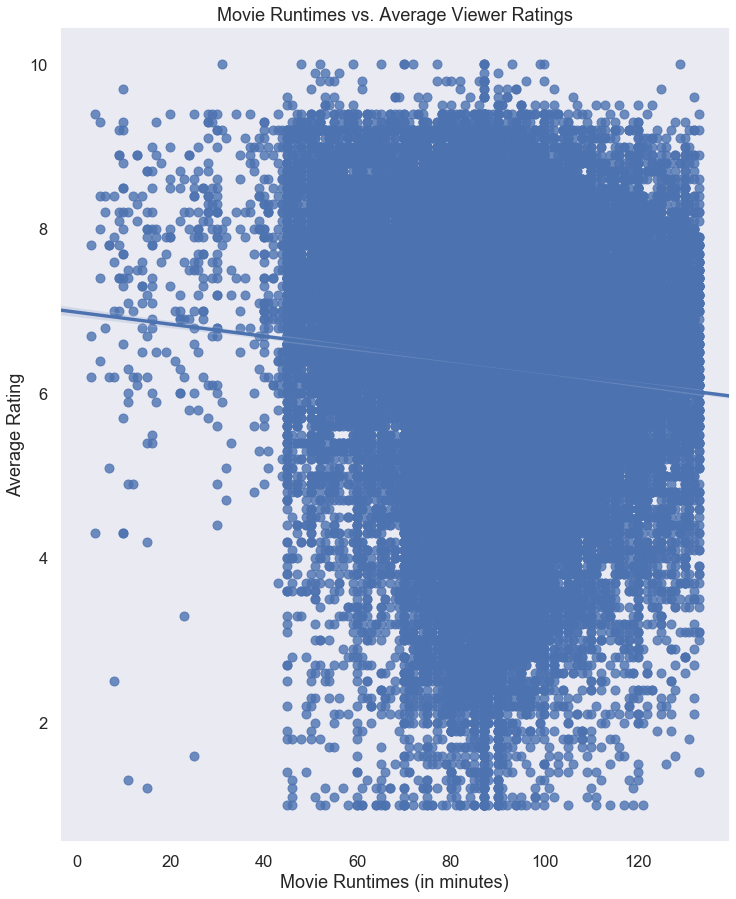

In [152]:
#Replace Outliers with Median Values
sns.regplot(x= 'runtime_minutes', y= 'averagerating', data= imdb_ratings_basics_df)
plt.grid(False)
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

In [90]:
imdb_ratings_basics_df.cov() #Calculate the covariance between runtime vs. averagerating with outliers

,start_year,runtime_minutes,averagerating,numvotes
start_year,6.837216,1.266178,0.159263,-2.256047e+03
runtime_minutes,1.266178,39020.136103,-1.973854,7.732181e+04
averagerating,0.159263,-1.973854,2.175561,1.987416e+03
numvotes,-2256.046892,77321.813097,1987.415945,9.177278e+08


In [91]:
imdb_ratings_basics_df.corr() #Calculate the correlation coefficient with outliers

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.002451,0.041294,-0.028481
runtime_minutes,0.002451,1.000000,-0.006775,0.012921
averagerating,0.041294,-0.006775,1.000000,0.044478
numvotes,-0.028481,0.012921,0.044478,1.000000


#### Just for Kicks, Let's See What the Plot Looks Like if I Left the Outliers in

Text(0.5, 1.0, 'Movie Runtimes vs. Average Viewer Ratings')

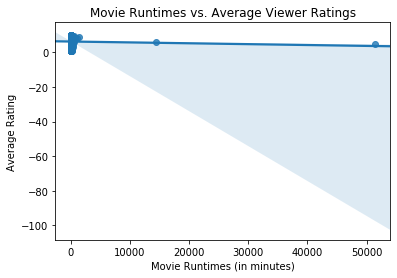

In [92]:
#Regression Plot of Runtime vs Average Rating with Outliers
sns.regplot(x= 'runtime_minutes', y= 'averagerating', data= imdb_ratings_basics_df)
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

Text(0.5, 1.0, 'Movie Runtimes vs. Average Viewer Ratings')

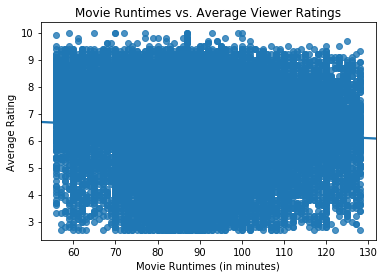

In [56]:
#Regression Plot of Runtime vs Average Rating Minus Outliers
sns.regplot(x= 'runtime_minutes', y= 'averagerating', data= ratings_basics_trim_df)
plt.xlabel('Movie Runtimes (in minutes)')
plt.ylabel('Average Rating')
plt.title('Movie Runtimes vs. Average Viewer Ratings')

#### Conclusion
* The **covariance** between movie runtime and average viewer ratings is **-2.02**,  a negative covariance indicates that runtime and average ratings are inversely related, however the covariance is also close to zero which tells us that there is no linear relationship between movie runtime and average rating. 
* The **Pearson correlation coefficient** in between average ratings and time is **-0.082** which is close to zero which indicates that the two variables have a near negligible effect on each other. 
* Overall, given the covariance and correlation coefficients, this tells us that movie run times whether long or short have no effect on the ratings left by movie viewers. Microsoft can take the liberty to make shorts, and/or lengthy documentaries without fear of sacrificing quality content.



### Question 2: Does a Larger Production Budget Equate to a Higher Gross?
This section explores the relationship between Production Budget vs. Domestic Gross Sales, Production Budget & Worldwide Gross Sales, and Domestic Gross Sales vs. Worldwide Gross Sales.

In [169]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625.0,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350.0,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868.0,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1316721747


In [119]:
tn_budgets_df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [68]:
tn_budgets_df.cov() #Covariance of production budget, domestic gross, & worldwide

,id,production_budget,domestic_gross,worldwide_gross
id,8.306544e+02,-4.251289e+07,1.623512e+07,-4.744745e+07
production_budget,-4.251289e+07,1.748250e+15,1.956443e+15,5.466678e+15
domestic_gross,1.623512e+07,1.956443e+15,4.656779e+15,1.119394e+16
worldwide_gross,-4.744745e+07,5.466678e+15,1.119394e+16,3.052707e+16


In [69]:
tn_budgets_df.corr() #Correlation coefficient of production budget, domestic gross, & worldwide

,id,production_budget,domestic_gross,worldwide_gross
id,1.000000,-0.035278,0.008255,-0.009422
production_budget,-0.035278,1.000000,0.685682,0.748306
domestic_gross,0.008255,0.685682,1.000000,0.938853
worldwide_gross,-0.009422,0.748306,0.938853,1.000000


#### Production Budget vs. Domestic Gross & Production Budget vs Foreign Gross

<Figure size 864x720 with 0 Axes>

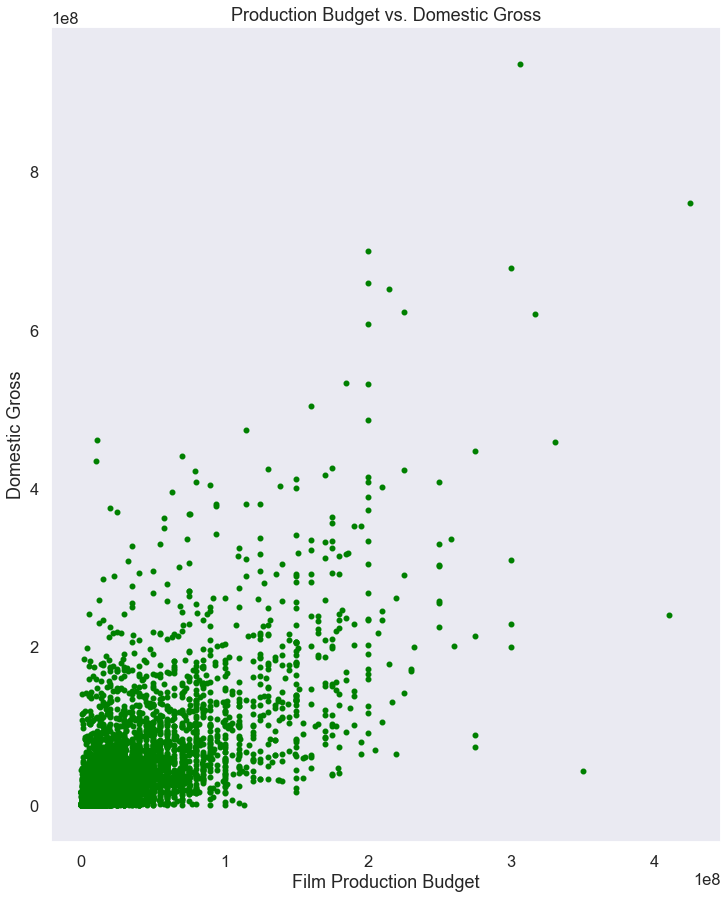

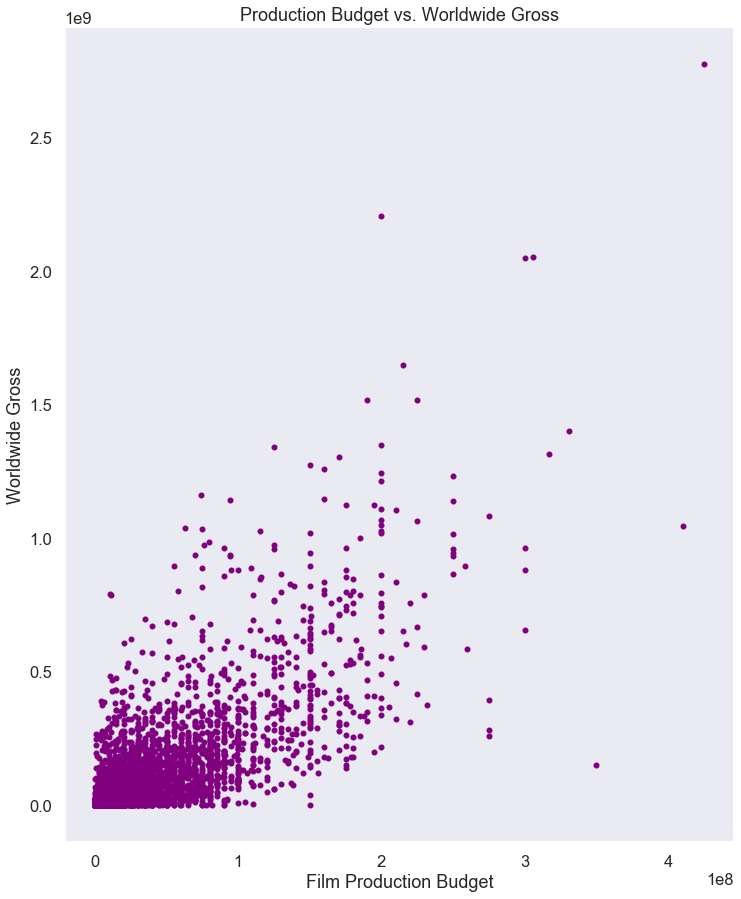

In [145]:
#Plot Production Budget vs. Domestic Gross vs Foreign Gross
budget_gross = plt.figure(figsize=(12,10))
budget_gross.suptitle('bold figure suptitle', fontsize=16, fontweight='bold')
ax = tn_budgets_df.plot.scatter(x='production_budget', y= 'domestic_gross', color= 'green', marker= 'o')
ax1 = tn_budgets_df.plot.scatter(x='production_budget', y= 'worldwide_gross', color= 'purple', marker= 'o')

ax.grid(False)
ax.set_xlabel('Film Production Budget')
ax.set_ylabel('Domestic Gross')
ax.set_title('Production Budget vs. Domestic Gross')

ax1.grid(False)
ax1.set_xlabel('Film Production Budget')
ax1.set_ylabel('Worldwide Gross')
ax1.set_title('Production Budget vs. Worldwide Gross')

plt.show()

Text(0.5, 1.0, 'Domestic Gross vs. Worldwide Gross')

<Figure size 720x576 with 0 Axes>

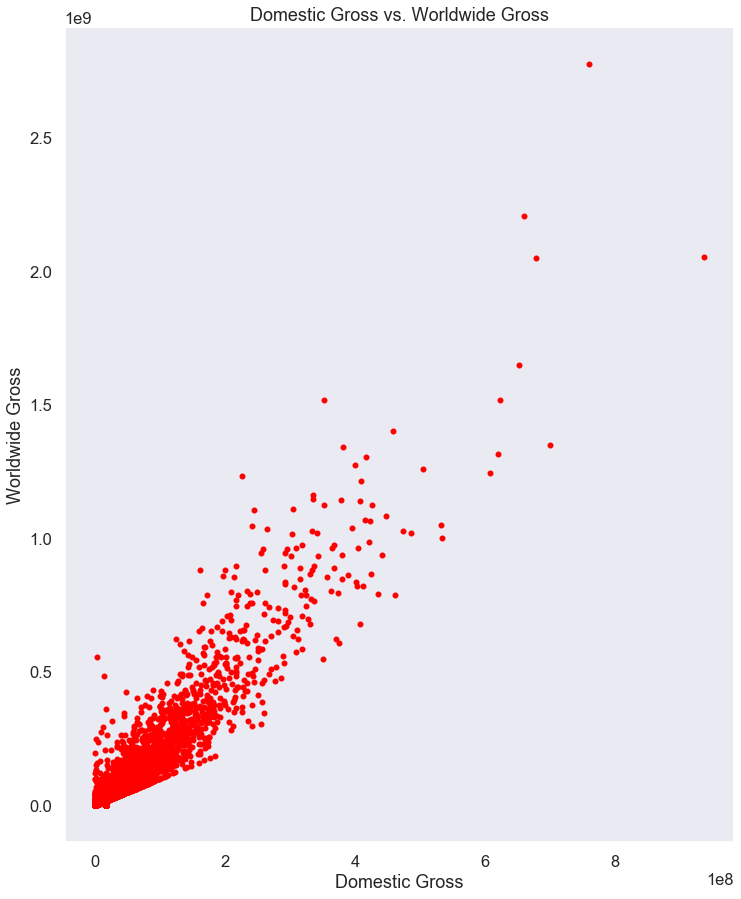

In [154]:
domestic_world = plt.figure(figsize=(10,8))
domestic_world.suptitle('bold figure suptitle', fontsize=16, fontweight='bold')
ax = tn_budgets_df.plot.scatter(x='domestic_gross', y= 'worldwide_gross', color= 'red', marker= 'o')

ax.grid(False)
ax.set_xlabel('Domestic Gross')
ax.set_ylabel('Worldwide Gross')
ax.set_title('Domestic Gross vs. Worldwide Gross')

#### Conclusion
* **Production Budget** & **Domestic Gross** is **0.685**, having a low correlation, whereas the **correlation coefficient (r)** for **Production Budget** & **Worldwide Gross** is **0.748**, a mid to high correlation. Meaning that a change in production budget results in an almost similar change in worldwide gross. The difference in r between the 2 comparisons indicates that international audiences may care more about things such as “big name” actors and actresses, production quality, etc. than domestic audiences who may just be attending a movie for the plot/storyline or genre.
* The **correlation coefficient** for **Domestic Gross** & **Worldwide Gross** is **0.938**. This means that they have a high positive correlation. Therefore if a film is successful domestically, there is a high probability that the film will also do well abroad with foreign audiences, and if a film does poorly domestically, then failure abroad can be expected, and foreign release should be reconsidered with return on investment in mind.


### Question 3:  What Regions are Movie Studios Targeting for Film Releases?
This section explores the Top 15 countries where studios have released popular films.

In [66]:
imdb_ratings_basics_df = imdb_ratings_basics_df.rename(columns = {'primary_title' : 'title'}) 
#Renamed 'primary_title' to 'title' inorder to merge imdb_ratings_basics_df and imdb_titlea_df 

In [171]:
titleakas_ratings_df = imdb_titlea_df.merge(imdb_ratings_basics_df) #Merge Title AKAs and IMDB Ratings by "title" column
titleakas_ratings_df.tail()

,title_id,ordering,title,region,types,is_original_title,tconst,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,time
136683,tt9657946,1,Homing,XWW,imdbDisplay,0.0,tt9657946,Querência,2019,90.0,Drama,6.0,16,4.499810
136684,tt9723084,1,Anderswo. Allein in Afrika,DE,imdbDisplay,0.0,tt9723084,Anderswo. Allein in Afrika,2018,103.0,"Adventure,Documentary",6.7,35,4.634729
136685,tt9723084,2,Anderswo. Allein in Afrika,US,original,1.0,tt9723084,Anderswo. Allein in Afrika,2018,103.0,"Adventure,Documentary",6.7,35,4.634729
136686,tt9726638,2,Monkey King: The Volcano,US,original,1.0,tt9726638,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6,4.499810
136687,tt9827784,3,Farewell Song,XWW,imdbDisplay,0.0,tt9827784,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6,4.753590


In [71]:
titleakas_ratings_df.describe()

,ordering,is_original_title,start_year,runtime_minutes,averagerating,numvotes,time
count,136688.000000,136688.000000,136688.000000,136688.000000,136688.000000,1.366880e+05,136688.000000
mean,3.545161,0.215579,2014.192819,91.657051,6.273653,1.095565e+04,4.499750
std,4.850936,0.411225,2.578841,16.292473,1.397464,5.987699e+04,0.203657
min,1.000000,0.000000,2010.000000,3.000000,1.000000,5.000000e+00,1.098612
25%,1.000000,0.000000,2012.000000,85.000000,5.400000,2.000000e+01,4.442651
50%,2.000000,0.000000,2014.000000,90.000000,6.400000,1.020000e+02,4.499810
75%,4.000000,0.000000,2016.000000,100.000000,7.200000,8.100000e+02,4.605170
max,55.000000,1.000000,2019.000000,133.000000,10.000000,1.841066e+06,4.890349


In [96]:
top15 = titleakas_ratings_df['region'].value_counts()[:15] #Find the top 15 regions and store them in a list
print(top15)
type(top15)

US     64925
XWW    15084
GB      6166
IN      5860
CA      4366
FR      3454
DE      3134
SE      2357
ES      2304
IT      2227
AU      1732
TR      1257
AR      1208
BR      1127
JP      1126
Name: region, dtype: int64


pandas.core.series.Series

Text(0.5, 1.0, 'Top 15 Regions for Movie Releases')

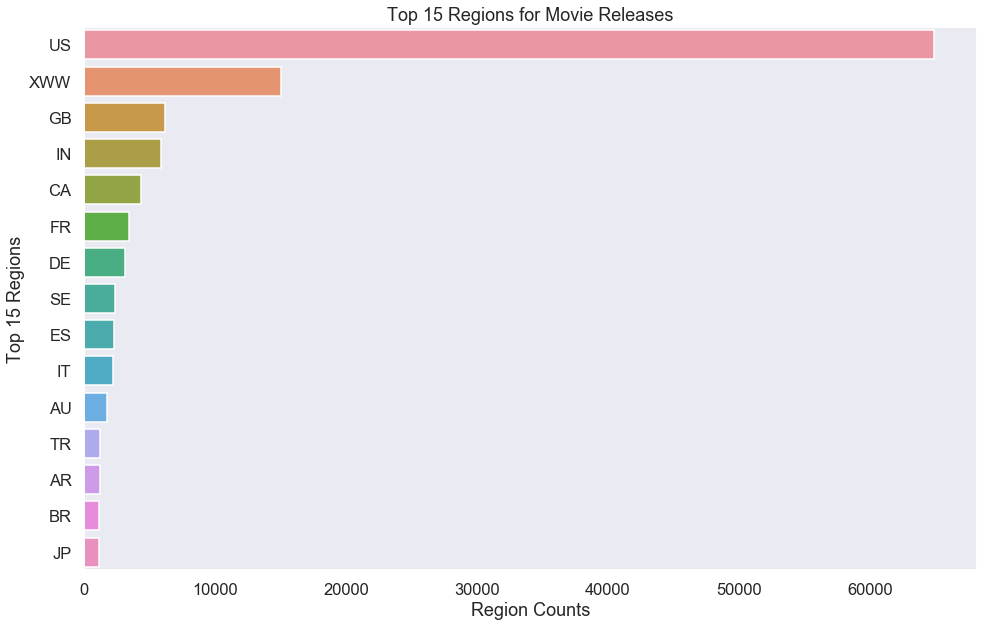

In [151]:
plt.figure(figsize=(16,10))
plt.grid(False)
sns.set_context('talk')
sns.barplot(top15.values, top15.index)
plt.ylabel('Top 15 Regions')
plt.xlabel('Region Counts')
plt.title('Top 15 Regions for Movie Releases')

#### Conclusion
* If Microsoft follows the blueprint of existing studios by trageting these regions in regards to the release patterns and promo of existing major studios, then then they will see similar success, and will avoid reinventing the wheel.
* Alternatively if Microsoft were looking to render their potential movie studio competitors irrelevant, they should avoid these top target countries, and focus on serving smaller, niche markets, and then build up their brand recognition in the movie space, before diving into the ring with leading studios and facing anihilation.
